In [2]:
import os
import numpy as np
import pandas as pd
import scipy
import anndata
import scanpy as sc
import pybiomart
import scvi
import torch
import random
import seaborn as sns
import matplotlib as plt

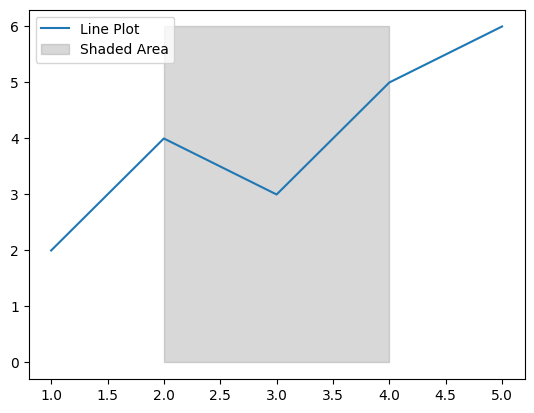

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
x_values = [1, 2, 3, 4, 5]
y_values = [2, 4, 3, 5, 6]

# Create a line plot
sns.lineplot(x=x_values, y=y_values, label='Line Plot')

# Specify the x-axis values for the shaded area
x_shaded = [2, 4]

# Specify the corresponding y-axis values for the shaded area
y_shaded_lower = [0, 0]
y_shaded_upper = [6, 6]

# Fill the area between the curves
plt.fill_between(x_shaded, y_shaded_lower, y_shaded_upper, color='gray', alpha=0.3, label='Shaded Area')

# Show the plot
plt.legend()
plt.show()


In [4]:
####Define a plotUMAP
def PlotUMAP(adata, markers, layer='log2_counts_scvi', size=2, vmin='p0', vmax='p99'):
    for i in range(len(markers)):
        sc.pl.umap(adata,
                  color=markers[i],
                  layer=layer,
                  size=size,
                  cmap=sns.blend_palette(['lightgray', sns.xkcd_rgb['red orange']], as_cmap=True),
                   vmin=vmin, vmax=vmax)

In [3]:
cwd = os.getcwd()
adata = sc.read_h5ad(cwd+'/outs/240101_kinker_scvi.h5ad')
adata

AnnData object with n_obs × n_vars = 53513 × 23081
    obs: 'CellLine', 'Pool', 'Indication', 'Genes_expressed', 'Discrete_cluster_minpts5_eps1.8', 'Discrete_cluster_minpts5_eps1.5', 'Discrete_cluster_minpts5_eps1.2', 'CNA_subclone', 'SkinPig_score', 'EMTI_score', 'EMTII_score', 'EMTIII_score', 'IFNResp_score', 'p53Sen_score', 'EpiSen_score', 'StressResp_score', 'ProtMatu_score', 'ProtDegra_score', 'G1/S_score', 'G2/M_score', 'n_genes', '_scvi_batch', '_scvi_labels', 'leiden_scvi'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'leiden_scvi_colors', 'neighbors_scvi', 'umap'
    obsm: 'X_scvi', 'X_umap'
    layers: 'counts', 'counts_scvi'
    obsp: 'neighbors_scvi_connectivities', 'neighbors_scvi_distances'

In [4]:
%%time
adata.layers['log2_counts'] = sc.pp.log1p(adata.layers['counts'].copy(), base=2)
adata.layers['log2_counts_scvi'] = sc.pp.log1p(adata.layers['counts_scvi'].copy(), base=2)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


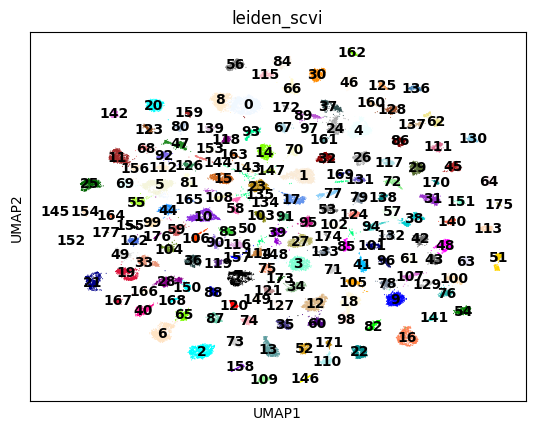

In [14]:
sc.pl.umap(adata, color=['leiden_scvi'], legend_loc='on data', palette=list(plt.colors.CSS4_COLORS.values()))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


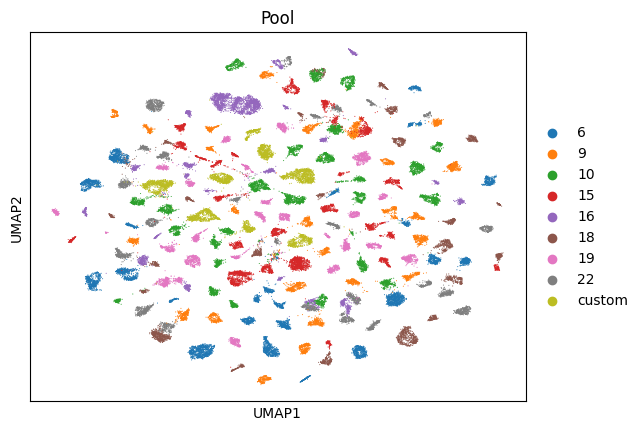

In [15]:
sc.pl.umap(adata, color=['Pool'])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


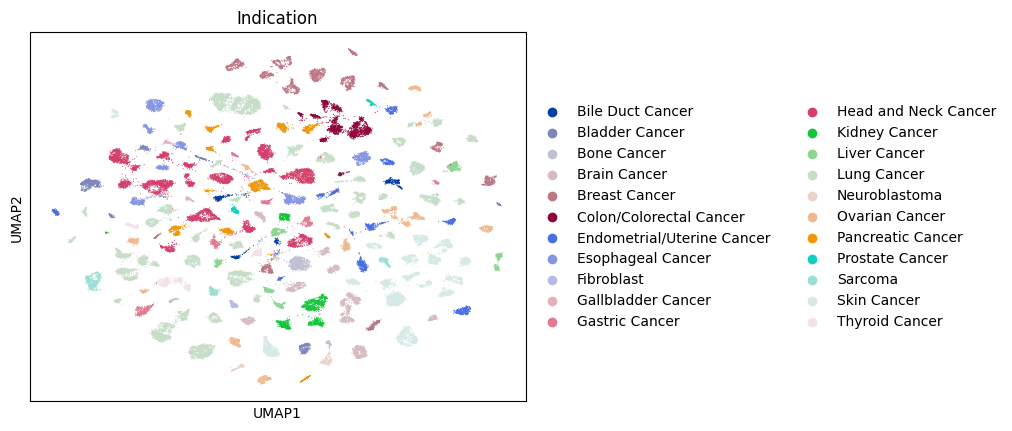

In [16]:
sc.pl.umap(adata, color=['Indication'])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


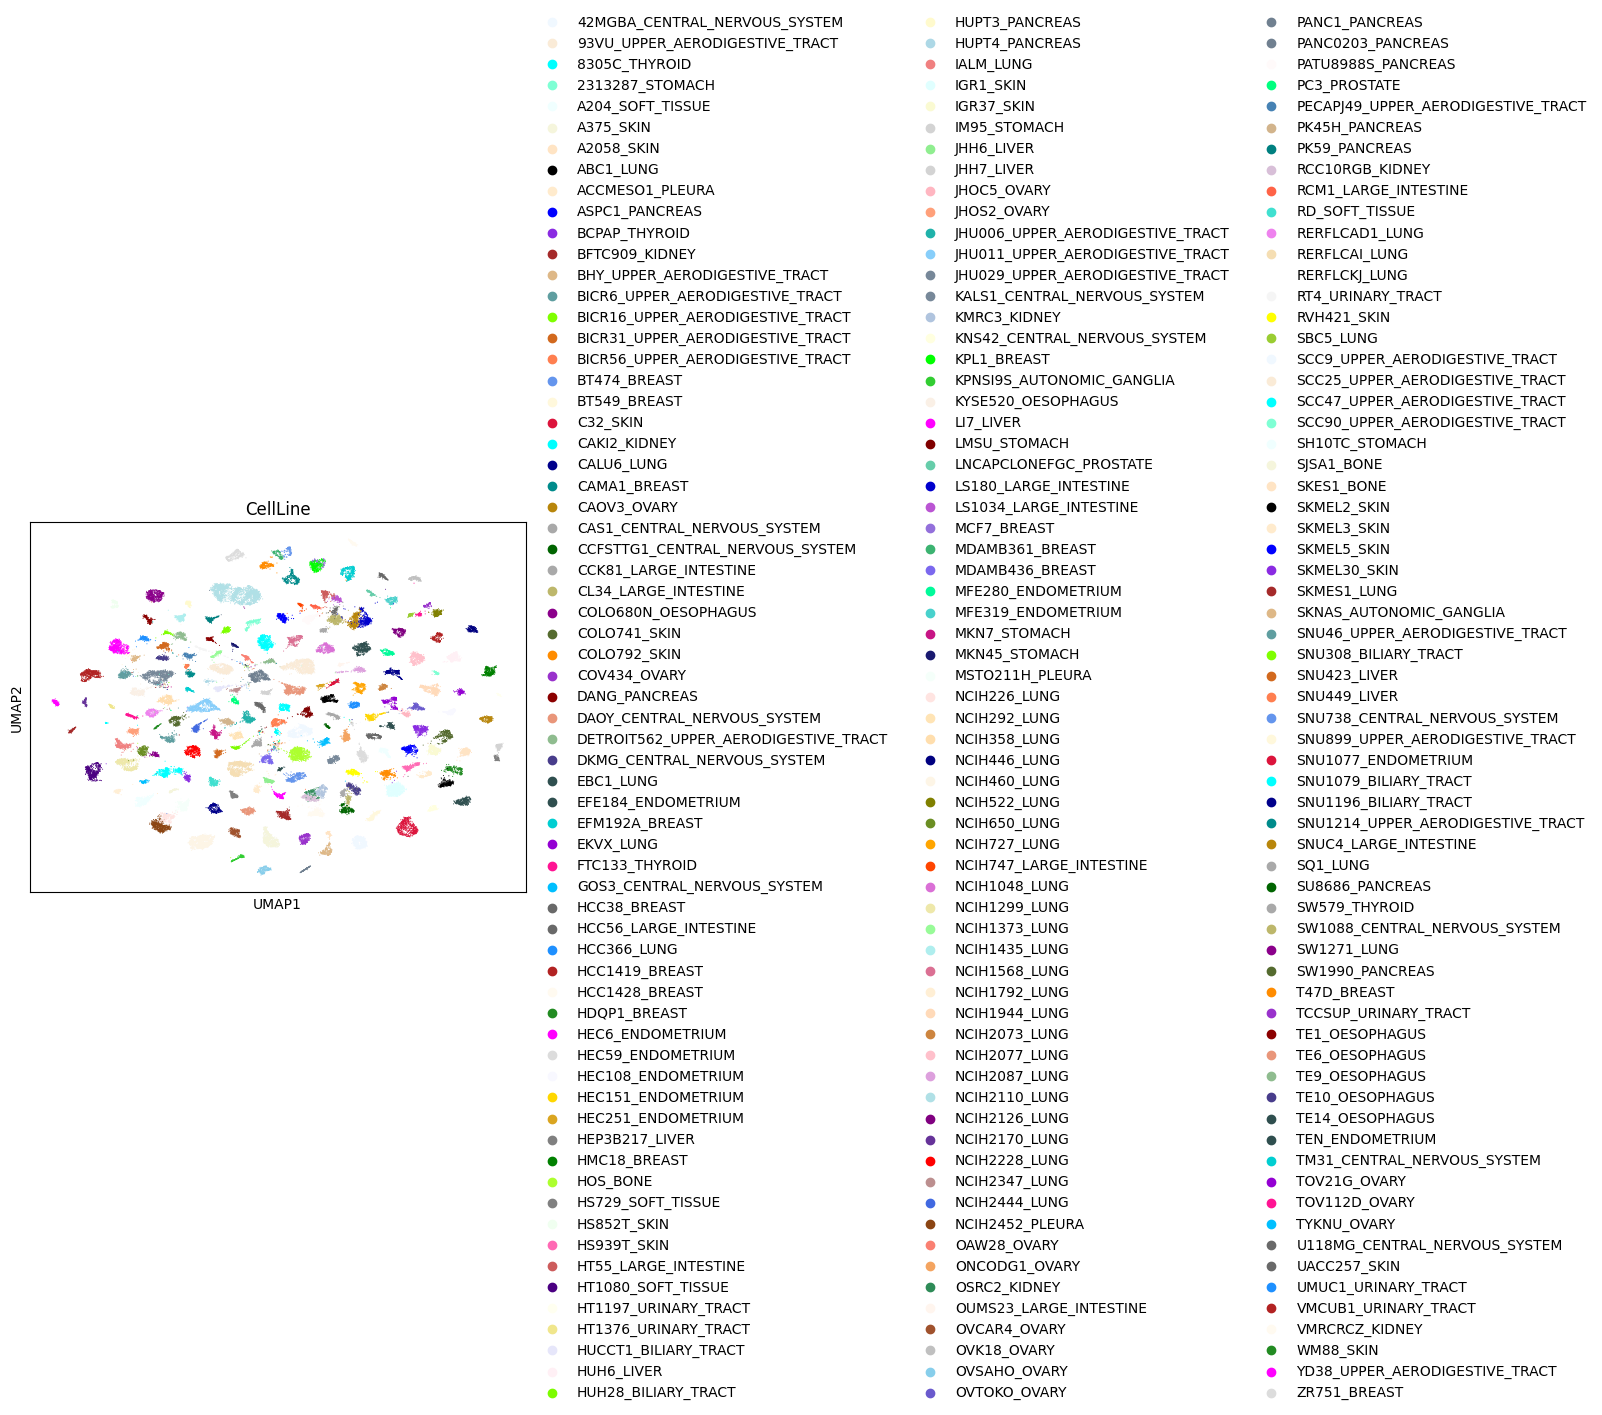

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


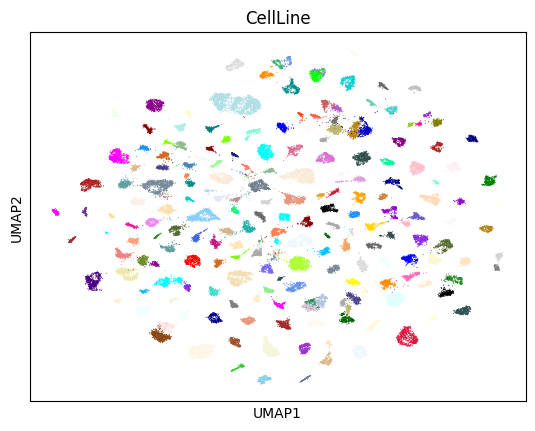

In [17]:
sc.pl.umap(adata, color=['CellLine'], palette=list(plt.colors.CSS4_COLORS.values()))
sc.pl.umap(adata, color=['CellLine'], legend_loc=None, palette=list(plt.colors.CSS4_COLORS.values()))